In [6]:
import pandas as pd

In [7]:
dataset_url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
dataset = pd.read_csv(dataset_url)
dataset.head(10)

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04
5,1.8100,98.960,0.0,0.0,-1.29
6,1.9352,96.944,0.0,0.0,-1.64
7,1.4054,118.176,4.0,0.0,-0.43
8,4.3002,215.894,0.0,0.6,-4.57
9,2.5654,132.206,0.0,0.6,-4.37


In [8]:
X = dataset.drop(['logS'], axis = 1)
Y = dataset.iloc[:,-1]

In [9]:
X.head(5)

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.5954,167.850,0.0,0.0
1,2.3765,133.405,0.0,0.0
2,2.5938,167.850,1.0,0.0
3,2.0289,133.405,1.0,0.0
4,2.9189,187.375,1.0,0.0


In [10]:
Y.head(5)

0   -2.18
1   -2.00
2   -1.74
3   -1.48
4   -3.04
Name: logS, dtype: float64

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
model = linear_model.LinearRegression()
model.fit(X,Y)

LinearRegression()

In [14]:
Y_pred = model.predict(X)
Y_pred

array([-2.77628837, -2.38661054, -2.77190108, ..., -4.73721496,
       -4.19663007, -2.61784284])

In [16]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Square Error (MSE): %.2f'% mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y, Y_pred))

Coefficients: [-0.74173609 -0.00659927  0.00320051 -0.42316387]
Intercept: 0.25650068309971763
Mean Square Error (MSE): 1.01
Coefficient of determination (R^2): 0.77


In [17]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental Logs')

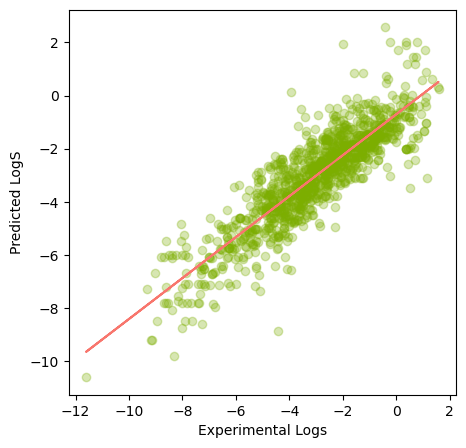

In [23]:
plt.figure(figsize=(5,5))
plt.scatter(x= Y, y = Y_pred, c="#7CAE00", alpha = 0.3)
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)
plt.plot(Y,p(Y), "#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental Logs')

In [24]:
import pickle
pickle.dump(model, open('Solubility_Model.pkl','wb'))